## Feature and Model Selection

This step identifies the number of features that will be able to model and predict our target variable. Once the number of features have been determined, the features will be analyzed based on its correlation among each other. The correlated features will then be removed and the final model will be fit again to get the scores.

In [1]:
import pandas as pd

df = pd.read_csv('cleaned_onlinepopularity.csv',index_col=0)

In [2]:
copied_df = df.copy()

In [3]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731,12,219.0,0.663594,1.0,0.815385,4,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,731,9,255.0,0.604743,1.0,0.791946,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,731,9,211.0,0.575130,1.0,0.663866,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,731,9,531.0,0.503788,1.0,0.665635,9,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,731,13,1072.0,0.415646,1.0,0.540890,19,19,20,0,...,1,0,0,0,1,0,0,0,0,0


In [4]:
pd.set_option('display.max_rows',100)

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,39533,39534,39535,39536,39537,39538,39539,39540,39541,39542
timedelta,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
n_tokens_title,12.000000,9.000000,9.000000,9.000000,13.000000,10.000000,8.000000,12.000000,11.000000,10.000000,...,9.000000,13.000000,8.000000,13.000000,11.000000,11.000000,12.000000,10.000000,6.000000,10.000000
n_tokens_content,219.000000,255.000000,211.000000,531.000000,1072.000000,370.000000,960.000000,989.000000,97.000000,231.000000,...,251.000000,478.000000,2509.000000,1629.000000,223.000000,346.000000,328.000000,442.000000,682.000000,157.000000
n_unique_tokens,0.663594,0.604743,0.575130,0.503788,0.415646,0.559889,0.418163,0.433574,0.670103,0.636364,...,0.666667,0.514039,0.348878,0.425711,0.653153,0.529052,0.696296,0.516355,0.539493,0.701987
n_non_stop_words,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,0.815385,0.791946,0.663866,0.665635,0.540890,0.698198,0.549834,0.572108,0.836735,0.797101,...,0.786164,0.641844,0.464923,0.606092,0.825758,0.684783,0.885057,0.644128,0.692661,0.846154
num_hrefs,4.000000,3.000000,3.000000,9.000000,19.000000,2.000000,21.000000,20.000000,2.000000,4.000000,...,21.000000,18.000000,23.000000,15.000000,5.000000,9.000000,9.000000,24.000000,10.000000,1.000000
num_self_hrefs,2.000000,1.000000,1.000000,0.000000,19.000000,2.000000,20.000000,20.000000,0.000000,1.000000,...,13.000000,2.000000,1.000000,12.000000,3.000000,7.000000,7.000000,1.000000,1.000000,1.000000
num_imgs,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,20.000000,20.000000,0.000000,1.000000,...,9.000000,2.000000,10.000000,6.000000,1.000000,1.000000,3.000000,12.000000,1.000000,0.000000
num_videos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,48.000000,1.000000,0.000000,2.000000


In [6]:
y = df.loc[:,['shares']]
y.head()

,shares
0,593
1,711
2,1500
3,1200
4,505


In [7]:
df = df.drop(columns='shares')
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731,12,219.0,0.663594,1.0,0.815385,4,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,731,9,255.0,0.604743,1.0,0.791946,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,731,9,211.0,0.575130,1.0,0.663866,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,731,9,531.0,0.503788,1.0,0.665635,9,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,731,13,1072.0,0.415646,1.0,0.540890,19,19,20,0,...,1,0,0,0,1,0,0,0,0,0


In [8]:
X = df
X.shape[1]

68

## First Attempt: No change in dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, X.shape[1], 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [11]:
wrapped_selectors = np.array(selectors)

In [12]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [13]:
x_values

array([67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51,
       50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
      dtype=object)

In [14]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

In [15]:
from sklearn.feature_selection import RFECV

estimator = LinearRegression(n_jobs=-1)
rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [16]:
rfecv_scores = rfe.grid_scores_
rfecv_scores

array([0.00166659, 0.00183287, 0.00197858, 0.00592889, 0.00587541,
       0.00569987, 0.00798893, 0.00761957, 0.00969784, 0.01053437,
       0.01055338, 0.01081751, 0.01078126, 0.01114321, 0.01078883,
       0.01317731, 0.01361302, 0.01377716, 0.01356566, 0.01447204,
       0.01518503, 0.01531156, 0.01511012, 0.01573907, 0.01570148,
       0.01554132, 0.01564159, 0.01527531, 0.01567098, 0.01446852,
       0.01538172, 0.01546299, 0.01532345, 0.01522123, 0.01517468,
       0.01518915, 0.01480156, 0.01496796, 0.0154716 , 0.01517486,
       0.01481252, 0.01533154, 0.01532151, 0.01526028, 0.01534127,
       0.01575782, 0.01588251, 0.01588624, 0.01624636, 0.01614373,
       0.0164359 , 0.01646178, 0.01653067, 0.01647534, 0.0165291 ,
       0.01649988, 0.01751367, 0.02166003, 0.02131124, 0.02244657,
       0.02356323, 0.02352768, 0.02375096, 0.02368294, 0.02367832,
       0.02384171, 0.02370364, 0.02375533])

In [17]:
grid_scores = rfe.grid_scores_
x_value_range = list(range(0, 67))[::1]

In [18]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range[-68:], grid_scores[-68:])
plot([score_trace])

**Results:** After running the dataset in its original state (after feature engineering), the RFE scores were really so bad and even getting negative scores while RFECV score seems to at least be stable enough at 0.02 (which is still not good enough) by using 57 features. Based on this, it was decided to try removing outliers first then proceed with selecting a good fit model again.

### Removing Outliers:

In [19]:
y.describe()

,shares
count,39543.000000
mean,3396.691172
std,11640.332505
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


After running descriptive statistics on the target variable (number of shares), it was found out that maximum shares is at 843,300. Decided to try how many rows have 100,000 or more likes and found that there were only 58 of them. We can say that these rows are outliers. However, doing this will have a minimal effect on our dataset because it is only a very small percentage. Thus, it was decided to try getting only those rows with shares of less than 10000. Filtering this dataset using that information reduced the rows to approximately 37000 so it seems that we will still get informative results based on it.

In [20]:
len(y[y['shares'] < 10000])
# 37332

37332

In [21]:
df_removeoutliers = copied_df[copied_df['shares']<10000]
df_removeoutliers.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731,12,219.0,0.663594,1.0,0.815385,4,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,731,9,255.0,0.604743,1.0,0.791946,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,731,9,211.0,0.575130,1.0,0.663866,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,731,9,531.0,0.503788,1.0,0.665635,9,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,731,13,1072.0,0.415646,1.0,0.540890,19,19,20,0,...,1,0,0,0,1,0,0,0,0,0


In [22]:
y_nooutliers = df_removeoutliers.loc[:,['shares']]
y_nooutliers.head()

,shares
0,593
1,711
2,1500
3,1200
4,505


In [23]:
y_nooutliers.describe()

,shares
count,37332.000000
mean,2021.623888
std,1757.271870
min,1.000000
25%,925.000000
50%,1400.000000
75%,2400.000000
max,9900.000000


In [24]:
df_removeoutliers = df_removeoutliers.drop(columns='shares')
df_removeoutliers.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731,12,219.0,0.663594,1.0,0.815385,4,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,731,9,255.0,0.604743,1.0,0.791946,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,731,9,211.0,0.575130,1.0,0.663866,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,731,9,531.0,0.503788,1.0,0.665635,9,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,731,13,1072.0,0.415646,1.0,0.540890,19,19,20,0,...,1,0,0,0,1,0,0,0,0,0


In [25]:
X_nooutliers = df_removeoutliers
X_nooutliers.shape[1]

68

In [26]:
from sklearn.model_selection import train_test_split
X_nooutliers_train, X_nooutliers_test, y_nooutliers_train, y_nooutliers_test = train_test_split(X_nooutliers, y_nooutliers, test_size=0.33, random_state=13)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, X_nooutliers.shape[1], 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_nooutliers_rfe = rfe.fit_transform(X_nooutliers_train,y_nooutliers_train)
    X_test_nooutliers_rfe = rfe.transform(X_nooutliers_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_nooutliers_rfe,y_nooutliers_train)
    score = estimator.score(X_test_nooutliers_rfe,y_nooutliers_test)
    selectors.append(np.array([rfe, score, idx]))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validat

In [28]:
wrapped_nooutliers_selectors = np.array(selectors)

In [29]:
y_nooutliers_values = wrapped_nooutliers_selectors[:, 1]
x_nooutliers_values = wrapped_nooutliers_selectors[:, -1]

In [30]:
x_nooutliers_values

array([67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51,
       50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
      dtype=object)

In [31]:
from graph import trace_values, plot
trace = trace_values(x_nooutliers_values, y_nooutliers_values)
plot([trace])

In [32]:
from sklearn.feature_selection import RFECV

estimator = LinearRegression(n_jobs=-1)
rfecv_nooutliers = RFECV(estimator, step=1, cv=5)
X_nooutliers_train_rfecv = rfecv_nooutliers.fit_transform(X_nooutliers_train,y_nooutliers_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [33]:
rfecv_nooutliers_scores = rfecv_nooutliers.grid_scores_
rfecv_nooutliers_scores

array([ 1.46490983e-02, -2.47899400e+14, -2.47982391e+15, -2.10569599e+15,
       -2.19618602e+15, -2.19446903e+15, -2.19456253e+15, -1.90848912e+15,
       -2.20700478e+15, -5.70982119e+15, -5.29917486e+15, -2.65211722e+15,
       -2.50360140e+15, -3.51942777e+15, -2.86383089e+15, -2.88083102e+15,
       -3.01339867e+15, -2.60923873e+15, -2.10830675e+15, -2.13482359e+15,
       -2.15293663e+15, -2.15470462e+15, -2.15990902e+15, -2.15990904e+15,
       -1.96501602e+15, -2.19004253e+15, -2.40473015e+15, -2.90837702e+15,
       -2.83097031e+15, -3.29107455e+15, -3.25636555e+15, -3.17751036e+15,
       -3.17020361e+15, -3.18132794e+15, -3.18132796e+15, -3.41551915e+15,
       -4.02147643e+15, -3.48317423e+15, -3.61652629e+15, -3.29842310e+15,
       -3.30261447e+15, -3.36389863e+15, -3.36389958e+15, -3.28978153e+15,
       -3.31552645e+15, -2.73146613e+15, -2.64702906e+15, -2.53108676e+15,
       -3.92615915e+15, -3.91178080e+15, -3.91078587e+15, -3.56288756e+15,
       -3.88364268e+15, -

In [34]:
grid_scores_nooutliers = rfecv_nooutliers.grid_scores_
x_value_range_nooutliers = list(range(0, 67))[::1]

In [35]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range_nooutliers[-68:], grid_scores_nooutliers[-68:])
plot([score_trace])

**Results:** After running the RFE and RFECV where outliers were removed, the RFE scores improved from negative scores to 0.07 when features is around 57 which is an improvement from the previous RFECV results. The RFECV however did not produce good scores after. To get a better score, it seems that getting the logarithm of the target variable makes sense because most of the feature variables values are between 0 and 1.

### Getting Log of Target Variable

In [36]:
y_logged = np.log(y_nooutliers)
y_logged.head()

,shares
0,6.385194
1,6.566672
2,7.313220
3,7.090077
4,6.224558


In [37]:
X_logged = df_removeoutliers
X_logged.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731,12,219.0,0.663594,1.0,0.815385,4,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,731,9,255.0,0.604743,1.0,0.791946,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,731,9,211.0,0.575130,1.0,0.663866,3,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,731,9,531.0,0.503788,1.0,0.665635,9,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,731,13,1072.0,0.415646,1.0,0.540890,19,19,20,0,...,1,0,0,0,1,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
X_logged_train, X_logged_test, y_logged_train, y_logged_test = train_test_split(X_logged, y_logged, test_size=0.33, random_state=13)

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, X_logged.shape[1], 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_logged_rfe = rfe.fit_transform(X_logged_train,y_logged_train)
    X_test_logged_rfe = rfe.transform(X_logged_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_logged_rfe,y_logged_train)
    score = estimator.score(X_test_logged_rfe,y_logged_test)
    selectors.append(np.array([rfe, score, idx]))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validat

In [40]:
wrapped_logged_selectors = np.array(selectors)

In [41]:
y_logged_values = wrapped_logged_selectors[:, 1]
x_logged_values = wrapped_logged_selectors[:, -1]

In [42]:
x_logged_values

array([67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51,
       50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
      dtype=object)

In [43]:
from graph import trace_values, plot
trace = trace_values(x_logged_values, y_logged_values)
plot([trace])

In [44]:
from sklearn.feature_selection import RFECV

estimator = LinearRegression(n_jobs=-1)
rfecv_logged = RFECV(estimator, step=1, cv=5)
X_logged_train_rfecv = rfecv_logged.fit_transform(X_logged_train,y_logged_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [45]:
rfecv_logged_scores = rfecv_logged.grid_scores_
rfecv_logged_scores

array([ 2.14314123e-02, -1.01098881e+15, -9.15095156e+14, -7.67757419e+14,
       -3.38771852e+15, -4.04666099e+15, -4.04652997e+15, -2.19413382e+15,
       -2.54119351e+15, -1.27735936e+15, -1.23341107e+15, -2.48457456e+15,
       -1.28584706e+15, -1.10008337e+15, -1.16066928e+15, -2.11219526e+15,
       -1.69539672e+15, -1.59789503e+15, -1.98672208e+15, -1.96555538e+15,
       -1.99609280e+15, -2.25439474e+15, -1.94411084e+15, -2.00944852e+15,
       -1.97229338e+15, -2.34961190e+15, -2.31375582e+15, -2.17751478e+15,
       -2.06121792e+15, -2.17917207e+15, -2.18074318e+15, -2.18074318e+15,
       -2.16995888e+15, -2.14291350e+15, -1.80097919e+15, -1.80990905e+15,
       -1.87566478e+15, -1.90637294e+15, -1.90637381e+15, -1.94136432e+15,
       -1.94704183e+15, -1.51847461e+15, -1.52254755e+15, -1.49980864e+15,
       -1.49980890e+15, -1.46991123e+15, -1.41445316e+15, -1.39072808e+15,
       -2.47700243e+15, -2.47846299e+15, -2.47014903e+15, -2.47568507e+15,
       -2.28176956e+15, -

In [46]:
grid_scores_logged = rfecv_logged.grid_scores_
x_value_range_logged = list(range(0, 67))[::1]

In [47]:
from graph import trace_values, plot
score_trace = trace_values(x_value_range_logged[-68:], grid_scores_logged[-68:])
plot([score_trace])

**Results:** After running the RFE and RFECV where outliers were removed and transformed the target variable to its logarithmic function, the RFE scores improved from 0.07 to 0.11 when features is around 55 which is an improvement from the previous RFE results. The RFECV however still did not produce good scores after. The next step is to get the correlation of the 55 features selected by RFE.

In [48]:
rfe = RFE(estimator, n_features_to_select=55)
rfe.fit(X_logged_train,y_logged_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
  n_features_to_select=55, step=1, verbose=0)

In [49]:
selected_cols = X_logged_train.columns[rfe.support_]

In [50]:
selected_cols

Index(['timedelta', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
       'kw_avg_avg', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'is_nocontent', 'is_no_kw_min_min',
       'Year', 'Month', 'Week', 'Day', 'Dayofyear', 'data_channel_Bus',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Social Media', 'data_channel_Technology

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rfe_logged_model = RFE(model, n_features_to_select=55)
rfe_logged_model.fit(X_logged, y_logged)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=55, step=1, verbose=0)

In [52]:
len(X_logged.columns[rfe_logged_model.support_])
# 55

selected_cols = X_logged.columns[rfe_logged_model.support_]
pruned_X_logged = X_logged.iloc[:, rfe_logged_model.support_]

In [53]:
from sklearn.model_selection import train_test_split
X_train_pruned, X_test_pruned, y_train_pruned, y_test_pruned = train_test_split(
     pruned_X_logged, y_logged, test_size=0.33, random_state=20)

In [54]:
model.fit(X_train_pruned, y_train_pruned)
model.score(X_test_pruned, y_test_pruned)

0.11472157720796061

### Rank the Features

In [55]:
def feature_importances(df, estimator, df_cols = None):
    df_cols = df_cols or df.columns
    df_cols = df_cols.to_numpy()
    coefs = estimator.coef_
    abs_coefs = abs(coefs)
    paired = np.hstack((df_cols.reshape(-1, 1), coefs.reshape(-1, 1), abs_coefs.reshape(-1, 1)))
    ordered_cols = paired[paired[:, -1].argsort()][::-1]
    return ordered_cols

In [56]:
feature_scores = feature_importances(X_train_pruned,model)
feature_scores

array([['LDA_02', -1684634.5619716733, 1684634.5619716733],
       ['LDA_01', -1684634.4047050432, 1684634.4047050432],
       ['LDA_03', -1684634.3438207386, 1684634.3438207386],
       ['LDA_04', -1684634.2993473047, 1684634.2993473047],
       ['LDA_00', -1684634.0753083257, 1684634.0753083257],
       ['n_non_stop_words', -1618.1491571716294, 1618.1491571716294],
       ['is_nocontent', -1617.7448002765177, 1617.7448002765177],
       ['Year', -8.277025102551988, 8.277025102551988],
       ['Month', 1.1930907465459235, 1.1930907465459235],
       ['global_subjectivity', 0.3568628152142681, 0.3568628152142681],
       ['rate_positive_words', 0.3565563118676476, 0.3565563118676476],
       ['global_rate_negative_words', 0.2949028106238793,
        0.2949028106238793],
       ['min_positive_polarity', -0.2609750052200869, 0.2609750052200869],
       ['day_of_week_Sunday', 0.2476743921417611, 0.2476743921417611],
       ['global_sentiment_polarity', -0.23587053216861253,
        0.2358

### Exploring Correlations

In [57]:
bool_cols = X_train_pruned.select_dtypes(include='bool').columns
bool_cols

Index([], dtype='object')

In [58]:
df_reduced = pd.DataFrame(X_logged, columns = selected_cols)
df_reduced

,timedelta,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,731,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,...,0,0,0,0,1,0,0,0,0,0
1,731,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,...,0,0,0,0,1,0,0,0,0,0
2,731,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,...,0,0,0,0,1,0,0,0,0,0
3,731,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,...,0,0,0,0,1,0,0,0,0,0
4,731,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,...,1,0,0,0,1,0,0,0,0,0
5,731,0.559889,1.0,0.698198,2,2,0,0,4.359459,9,...,1,0,0,0,1,0,0,0,0,0
6,731,0.418163,1.0,0.549834,21,20,20,0,4.654167,10,...,0,0,0,0,1,0,0,0,0,0
7,731,0.433574,1.0,0.572108,20,20,20,0,4.617796,9,...,1,0,0,0,1,0,0,0,0,0
8,731,0.670103,1.0,0.836735,2,0,0,0,4.855670,7,...,1,0,0,0,1,0,0,0,0,0
9,731,0.636364,1.0,0.797101,4,1,1,1,5.090909,5,...,0,1,0,0,1,0,0,0,0,0


In [59]:
df_reduced.corr(method = 'pearson')

,timedelta,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
timedelta,1.000000,0.002707,-0.000059,0.003589,-0.001108,0.065943,-0.024520,-0.003877,-0.039016,0.048828,...,0.083420,-0.171770,0.016622,-0.003632,-0.003840,-0.008844,0.004432,0.004076,-0.003402,0.008812
n_unique_tokens,0.002707,1.000000,0.999600,0.999867,-0.004678,0.006494,0.020103,-0.000860,0.003750,-0.003406,...,-0.002447,-0.005648,-0.000691,-0.001582,-0.002238,-0.002271,-0.001954,-0.002365,0.010869,-0.002294
n_non_stop_words,-0.000059,0.999600,1.000000,0.999563,0.004826,0.013141,0.029552,-0.001158,0.002386,-0.001233,...,-0.000283,-0.002913,-0.007615,-0.002045,-0.002261,-0.001124,-0.001505,-0.002486,0.010764,-0.002621
n_non_stop_unique_tokens,0.003589,0.999867,0.999563,1.000000,-0.005377,0.007233,0.015718,-0.001243,0.000560,-0.004022,...,-0.001258,-0.004049,-0.006347,-0.001485,-0.002125,-0.002223,-0.002333,-0.002398,0.010811,-0.002182
num_hrefs,-0.001108,-0.004678,0.004826,-0.005377,1.000000,0.395366,0.342941,0.112754,0.201546,0.128408,...,-0.062711,-0.028053,0.100764,-0.002500,-0.007712,0.060093,0.045562,-0.012635,-0.011299,-0.032669
num_self_hrefs,0.065943,0.006494,0.013141,0.007233,0.395366,1.000000,0.248843,0.072983,-0.038076,0.103022,...,0.167844,-0.122254,-0.040636,-0.022325,0.012772,0.048556,0.021952,-0.017160,0.001212,-0.020156
num_imgs,-0.024520,0.020103,0.029552,0.015718,0.342941,0.248843,1.000000,-0.063415,0.055237,0.085252,...,-0.000857,-0.106538,0.160300,-0.006658,-0.006343,0.033632,0.044357,-0.007502,-0.005360,-0.024336
num_videos,-0.003877,-0.000860,-0.001158,-0.001243,0.112754,0.072983,-0.063415,1.000000,-0.066329,-0.025585,...,-0.094144,-0.088838,0.147633,-0.000022,0.012042,-0.003513,-0.015702,-0.004091,0.006953,-0.002078
average_token_length,-0.039016,0.003750,0.002386,0.000560,0.201546,-0.038076,0.055237,-0.066329,1.000000,0.018371,...,-0.156200,0.259703,0.017995,-0.001603,-0.010923,0.007203,0.021142,0.006471,-0.010573,-0.002044
num_keywords,0.048828,-0.003406,-0.001233,-0.004022,0.128408,0.103022,0.085252,-0.025585,0.018371,1.000000,...,0.140863,0.019323,0.058419,-0.001868,-0.020640,0.044108,0.058227,-0.013751,-0.010723,-0.018783


In [68]:
df_reduced.corr(method = 'spearman')

,timedelta,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
timedelta,1.000000,0.172162,-0.076186,0.151969,0.028045,0.060832,-0.162275,-0.131415,-0.043309,0.052664,...,0.084138,-0.172902,0.014944,-0.004309,-0.003331,-0.009019,0.005159,0.003809,-0.003282,0.008717
n_unique_tokens,0.172162,1.000000,-0.723484,0.882486,-0.267808,-0.064193,-0.387836,0.049457,0.093499,-0.092940,...,-0.030652,-0.104979,0.140656,0.016749,0.005772,-0.040368,-0.025120,0.005453,0.005746,0.009169
n_non_stop_words,-0.076186,-0.723484,1.000000,-0.572588,0.528443,0.201635,0.415261,-0.030038,0.053749,0.088650,...,-0.003784,0.131283,-0.223268,-0.014488,0.000247,0.051127,0.030703,-0.011677,-0.011051,-0.015650
n_non_stop_unique_tokens,0.151969,0.882486,-0.572588,1.000000,-0.319112,-0.098251,-0.458660,0.039716,-0.024288,-0.099015,...,-0.010803,-0.047401,0.003344,0.019458,0.008273,-0.040031,-0.029076,0.002989,0.002166,0.012712
num_hrefs,0.028045,-0.267808,0.528443,-0.319112,1.000000,0.346676,0.336999,-0.032927,0.218570,0.178844,...,-0.038748,0.016508,0.054877,-0.002708,-0.007592,0.069643,0.047893,-0.016086,-0.015065,-0.032750
num_self_hrefs,0.060832,-0.064193,0.201635,-0.098251,0.346676,1.000000,0.202807,0.072745,-0.061935,0.084215,...,0.180135,-0.160109,-0.046951,-0.011862,0.011694,0.017802,-0.000901,-0.009100,0.009878,-0.011633
num_imgs,-0.162275,-0.387836,0.415261,-0.458660,0.336999,0.202807,1.000000,-0.165316,0.057851,0.082792,...,0.028819,-0.018279,0.043511,-0.016704,-0.006039,0.043246,0.026105,0.000606,-0.004334,-0.018761
num_videos,-0.131415,0.049457,-0.030038,0.039716,-0.032927,0.072745,-0.165316,1.000000,-0.132589,0.017448,...,-0.099159,-0.062988,0.183600,0.005209,0.004731,-0.020457,-0.009598,-0.006031,0.016166,-0.000660
average_token_length,-0.043309,0.093499,0.053749,-0.024288,0.218570,-0.061935,0.057851,-0.132589,1.000000,0.020716,...,-0.152659,0.289882,-0.015474,-0.005344,-0.010304,0.007857,0.013365,0.011382,-0.007944,-0.002148
num_keywords,0.052664,-0.092940,0.088650,-0.099015,0.178844,0.084215,0.082792,0.017448,0.020716,1.000000,...,0.139961,0.016353,0.055920,-0.001902,-0.022585,0.044886,0.059270,-0.013115,-0.011055,-0.018342


**Results:** After getting the spearman correlation coefficient it was found out that there were several variables that are correlated with each other. Looked at each variable which has a correlation coefficient between -0.7 and 0.7. Removed columns based on the importance it holds in the ranking of the features. If it is not that important and it is correlated with another variable, that variable is removed. For this reason, the following variables were removed: min_negative_polarity, timedelta, Dayofweek, Week, abs_title_sentiment_polarity.

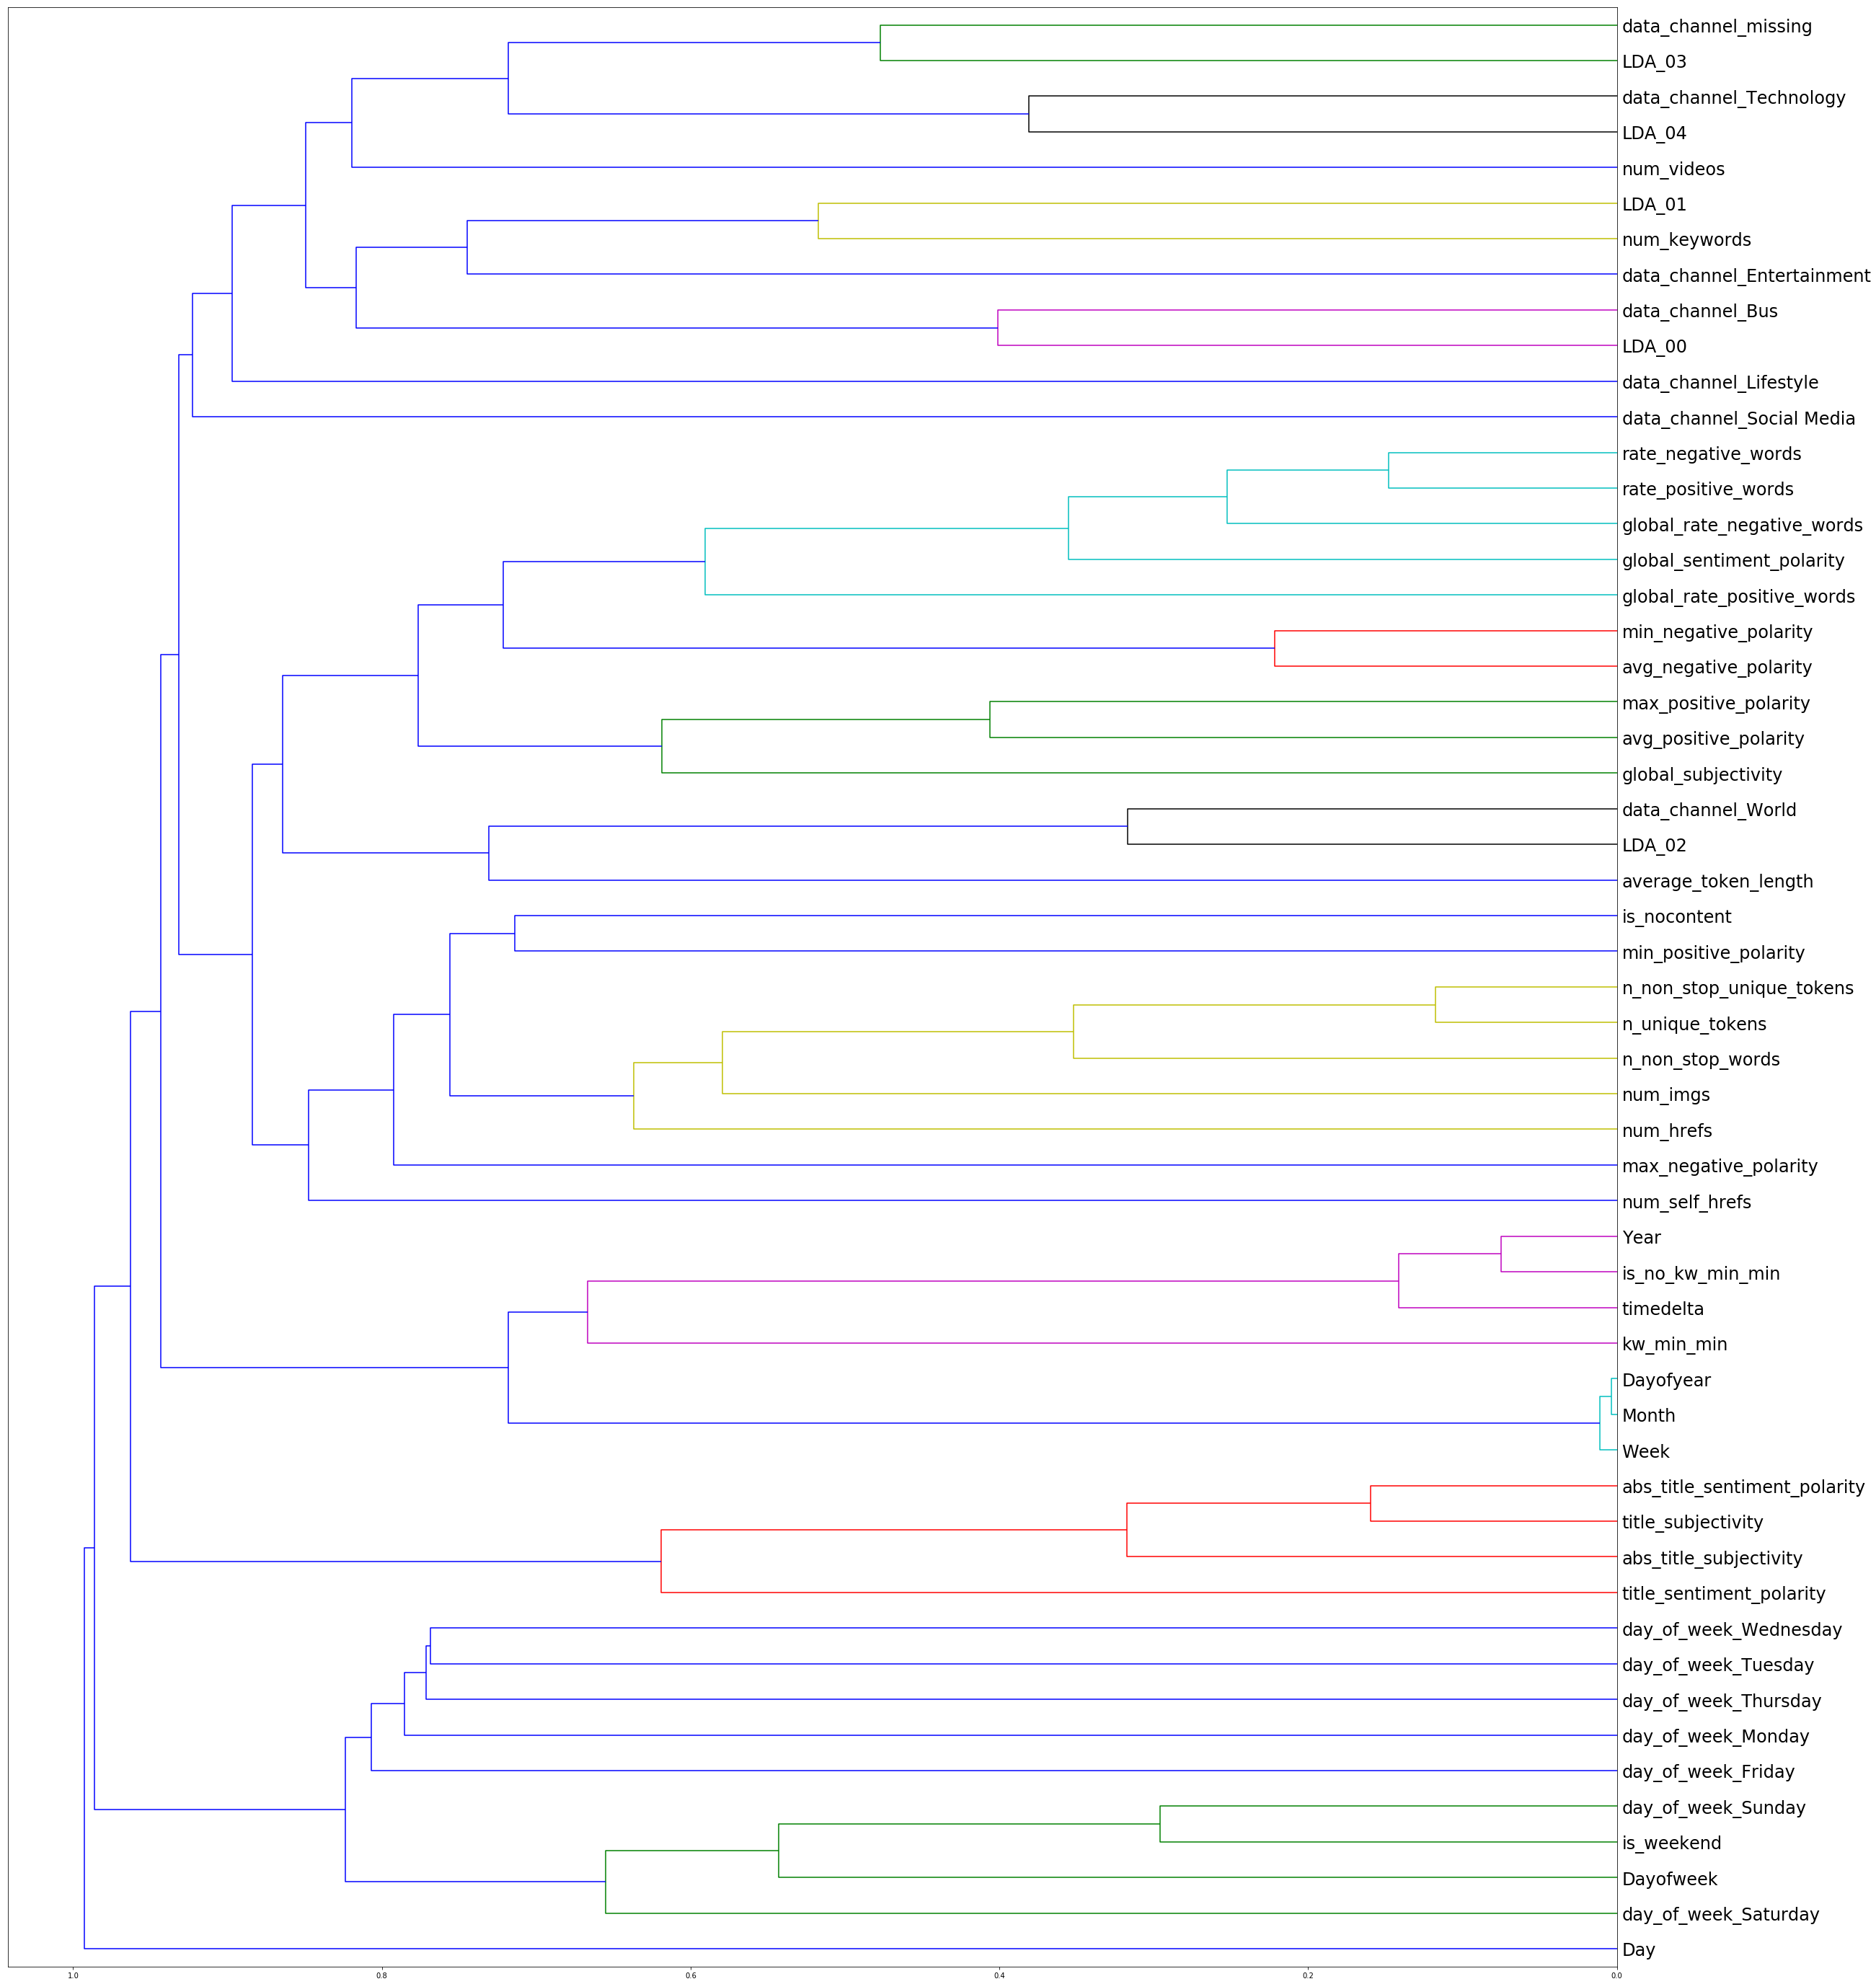

In [67]:
import scipy.cluster.hierarchy as hc
corr = df_reduced.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,50))
dendrogram = hc.dendrogram(z, labels = selected_cols, orientation = 'left', leaf_font_size=24)

In [70]:
X_reduced = X_logged.drop(columns=['min_negative_polarity','timedelta','Dayofweek','Week','abs_title_sentiment_polarity'])
X_reduced.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,data_channel_Technology,data_channel_World,data_channel_missing,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,12,219.0,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0,0,0,0,1,0,0,0,0,0
1,9,255.0,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0,0,0,0,1,0,0,0,0,0
2,9,211.0,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0,0,0,0,1,0,0,0,0,0
3,9,531.0,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0,0,0,0,1,0,0,0,0,0
4,13,1072.0,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,1,0,0,0,1,0,0,0,0,0


In [72]:
model_reduced = LinearRegression()

rfe_reduced_model = RFE(model_reduced,)
rfe_reduced_model.fit(X_reduced, y_logged)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0)

In [73]:
from sklearn.model_selection import train_test_split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
     X_reduced, y_logged, test_size=0.33, random_state=20)

In [74]:
model.fit(X_train_reduced, y_train_reduced)
model.score(X_test_reduced, y_test_reduced)

0.13728901554244044

**Results:** After reducing the features to 50, the score went up by 0.02.

## Final Thoughts

Inspite of the fact that the score provided by running the linear regression model for this dataset, I still think that there is a better way to predict the number of shares of an article based on different features. It seems that there may be other features that we can explore with to be able to produce a better RFE score. In addition, we can probably still also remove more features that are correlated and this may provide a better score.

It is actually interesting to note that the top ranking features are all about LDA. Also, these columns did not show any relationship even though if you look into these columns, it will be equal to 1 after summing them.